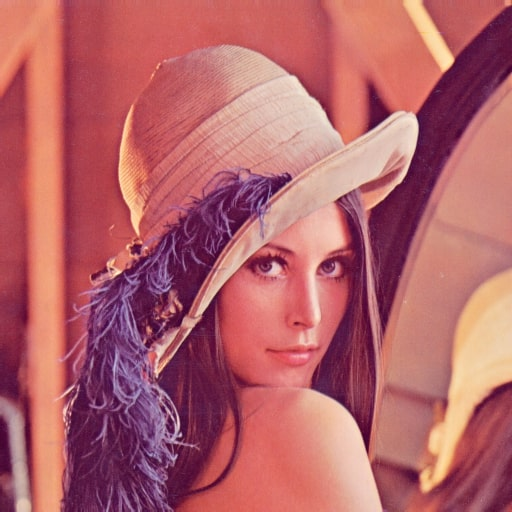

Image Size: 512x512, Channels: 3
Total Pixels: 262144
Black Pixels Count: 128052


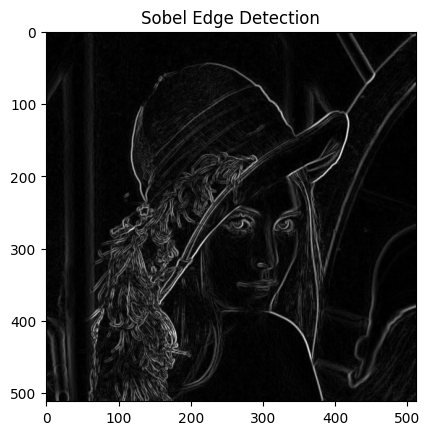

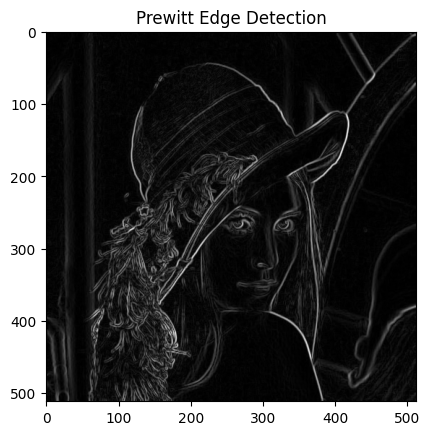

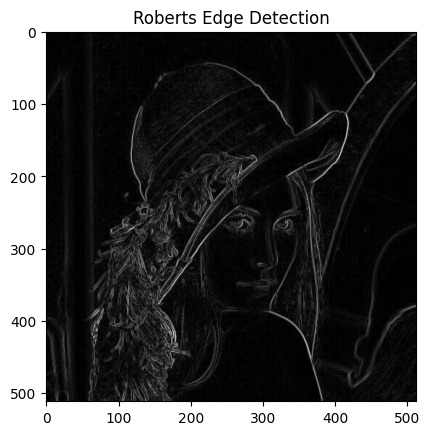

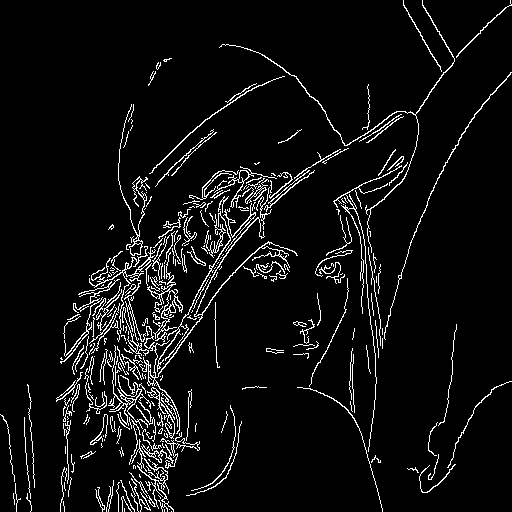

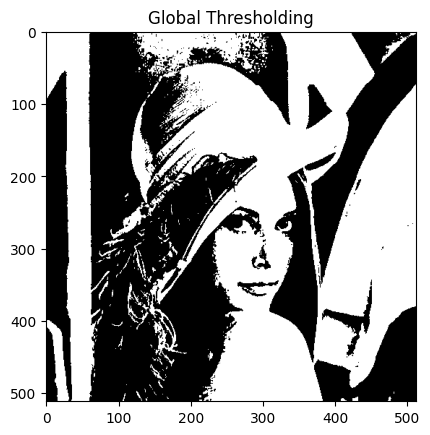

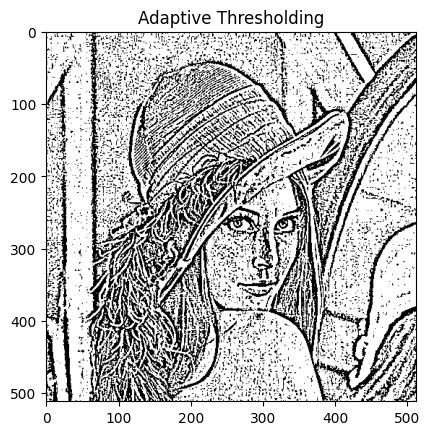

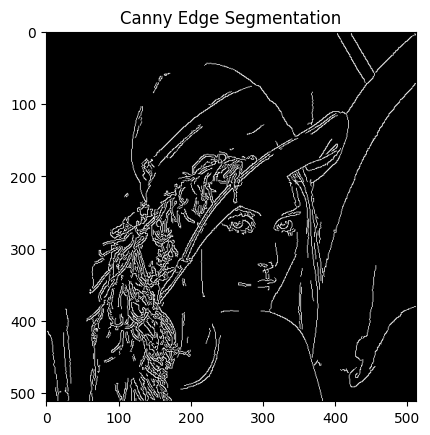

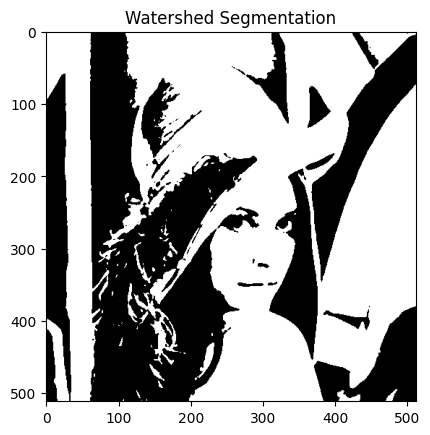

In [9]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.filters import sobel, prewitt, roberts
from google.colab.patches import cv2_imshow

# Task 1: Image Manipulation

# 1. Read the image
image = cv2.imread('/content/Lena_Image.jpg')

# 2. Display the image
cv2_imshow(image)

# 3. Extract Image Size
height, width, channels = image.shape
print(f'Image Size: {width}x{height}, Channels: {channels}')

# 4. Calculate Image Pixels
total_pixels = height * width
print(f'Total Pixels: {total_pixels}')

# 5. Convert RGB to Grayscale
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
grayscale = cv2.cvtColor(image_rgb, cv2.COLOR_RGB2GRAY)
cv2.imwrite('grayscale.jpg', grayscale)

# 6. Convert RGB to Binary using Thresholding
threshold = 127
_, binary_image = cv2.threshold(grayscale, threshold, 255, cv2.THRESH_BINARY)
cv2.imwrite('binary.jpg', binary_image)

# Count black pixels
black_pixels = np.sum(binary_image == 0)
print(f'Black Pixels Count: {black_pixels}')

# Task 2: Edge Detection

# Sobel Edge Detection
sobel_edges = sobel(grayscale)
plt.imshow(sobel_edges, cmap='gray')
plt.title('Sobel Edge Detection')
plt.show()

# Prewitt Edge Detection
prewitt_edges = prewitt(grayscale)
plt.imshow(prewitt_edges, cmap='gray')
plt.title('Prewitt Edge Detection')
plt.show()

# Roberts Cross Edge Detection
roberts_edges = roberts(grayscale)
plt.imshow(roberts_edges, cmap='gray')
plt.title('Roberts Edge Detection')
plt.show()

# Canny Edge Detection
canny_edges = cv2.Canny(grayscale, 100, 200)
cv2.imwrite('canny_edges.jpg', canny_edges)
cv2_imshow(canny_edges)

# Task 2: Image Segmentation

# Global Thresholding
_, global_thresh = cv2.threshold(grayscale, 127, 255, cv2.THRESH_BINARY)
plt.imshow(global_thresh, cmap='gray')
plt.title('Global Thresholding')
plt.show()

# Adaptive Thresholding
adaptive_thresh = cv2.adaptiveThreshold(grayscale, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive Thresholding')
plt.show()

# Edge Detection for Segmentation (Canny)
plt.imshow(canny_edges, cmap='gray')
plt.title('Canny Edge Segmentation')
plt.show()

# Region-Based Segmentation (Watershed Algorithm)
gray_blur = cv2.GaussianBlur(grayscale, (5, 5), 0)
_, binary_watershed = cv2.threshold(gray_blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
plt.imshow(binary_watershed, cmap='gray')
plt.title('Watershed Segmentation')
plt.show()